## import libraries 

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(host = host,
                       user = user,
                        password = pwd,
                        dbname = db
                       )
cur = conn.cursor()

## create the house table

make sure change the schema name to your gp number

In [4]:


# replace the schema and table name to your schema and table name
table_sql = """
            CREATE TABLE IF NOT EXISTS gp12.house
            (

                price integer,
                bed integer,
                bath integer,
                area integer,
                address VARCHAR(200),
                PRIMARY KEY(address)
            );

            """



use the bellow cell only if you want to delete the table

In [5]:
#conn.rollback()
#table_sql="drop table if exists gp12.house"

In [6]:

cur.execute(table_sql)
conn.commit()

## define the search region

In [7]:
url = 'https://www.trulia.com/VA/Fairfax_Station/22039/'

In [8]:
import urllib.request
response = urllib.request.urlopen(url)
html_data= response.read()
# print(html_data.decode('utf-8'))

In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data,'html.parser')
#print (soup)

## insert the records into database

In [10]:

for li_class in soup.find_all('li', class_ = 'Grid__CellBox-sc-144isrp-0 SearchResultsList__WideCell-b7y9ki-2 jiZmPM'):
    try:
        for price_div in li_class.find_all('div',{'data-testid':'property-price'}):
            price =int(price_div.text.replace('$','').replace(",",""))
        for bed_div in li_class.find_all('div', {'data-testid':'property-beds'}):
            bed= int(bed_div.text.replace('bd','').replace(",",""))
        for bath_div in li_class.find_all('div',{'data-testid':'property-baths'}):
            bath =int(bath_div.text.replace('ba','').replace(",",""))
        for area_div in li_class.find_all('div',{'data-testid':'property-floorSpace'}):
            area=int(area_div.text.split('sqft')[0].replace(",",""))
        for address_div in li_class.find_all('div',{'data-testid':'property-address'}):
            address =address_div.text

        try:
            sql_insert = """
                        insert into gp12.house(price,bed,bath,area,address)
                        values('{}','{}','{}','{}','{}')            
                        """.format(price,bed,bath,area,address)

            cur.execute(sql_insert)
            conn.commit()
        except:
            conn.rollback()
    except:
        pass
        

## Query the Table

In [11]:
df = pandas.read_sql_query('select * from gp12.house ', conn)
df[:]

,price,bed,bath,area,address
0,1195000,4,4,6114,"10130 Hampton Rd, Fairfax Station, VA 22039"
1,744000,4,4,3179,"8027 Oak Bridge Ln, Fairfax Station, VA 22039"
2,899950,4,3,2686,"7803 S Valley Dr, Fairfax Station, VA 22039"
3,1599000,6,5,9500,"10121 Hampton Rd, Fairfax Station, VA 22039"
4,1650000,6,6,9061,"11232 Devereux Manor Ln, Fairfax Station, VA 2..."
5,959995,4,5,4320,"9336 Braymore Cir, Fairfax Station, VA 22039"
6,1775000,5,5,7391,"8400 Cathedral Forest Dr, Fairfax Station, VA ..."
7,814900,4,4,2920,"9120 Silver Pointe Way, Fairfax Station, VA 22039"
8,1425000,5,5,6100,"5806 Fairview Woods Dr, Fairfax Station, VA 22039"
9,1325000,6,8,10444,"10313 Dominion Valley Dr, Fairfax Station, VA ..."


## basic stat

In [12]:
df.describe()

,price,bed,bath,area
count,4.600000e+01,46.000000,46.000000,46.000000
mean,7.598600e+05,4.065217,3.847826,3368.978261
std,3.829614e+05,0.928611,1.191962,2244.707123
min,2.645000e+05,2.000000,2.000000,1288.000000
25%,4.792250e+05,3.000000,3.000000,1736.750000
50%,6.574500e+05,4.000000,4.000000,2687.000000
75%,9.449838e+05,5.000000,5.000000,4364.000000
max,1.775000e+06,6.000000,8.000000,10444.000000


## price distribution

<AxesSubplot:>

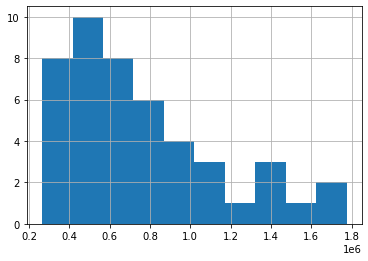

In [13]:
df['price'].hist()

## bed vs bath

<AxesSubplot:xlabel='bed', ylabel='bath'>

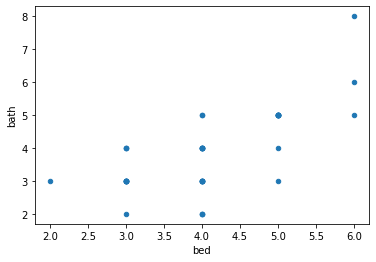

In [14]:
df.plot.scatter(x='bed',y='bath')